In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpngw
from scipy import ndimage
from skimage.future import graph
from matplotlib import pyplot as plt
import pickle

In [2]:
EU=np.array(plt.imread("./img/EU.png")*(2**16-1),dtype=np.uint16)


6


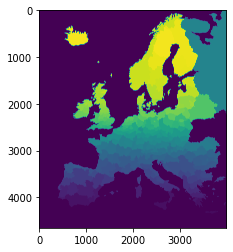

In [3]:
print(np.max(EU[-200:,1400:3500]))
EU[EU==6]=0
EU[EU==7]=0
EU[EU==1]=0
EU[EU==2]=0
plt.imshow(EU)



In [4]:
countries=ndimage.find_objects(EU)

In [5]:
x=0
EU_Map=np.zeros(EU.shape)
EU_states=[[] for _ in countries]
print(EU_states)
for i,c in enumerate(countries):
    if c is not None:
        
        s=EU[c]==i+1
        area=np.sum(s)
        
        coord=(c[0].start,c[1].start)
        cog=ndimage.center_of_mass(s)
        print(i+1,coord,area,cog)
        x+=1
        EU_Map[c]=EU_Map[c]+s*x

        EU_states[x].append((s,coord))
        #plt.imsave("./Data/"
        #           +str(x)
        #           +"_"
        #           +str(coord[0])
        #           +"_"
        #           +str(coord[1])
        #           +".png",
        #           s,
        #           cmap="gray")
        
        #plt.imshow(s)
        #plt.show()
        
plt.imsave("Data/map.png",EU_Map,cmap="gray")

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

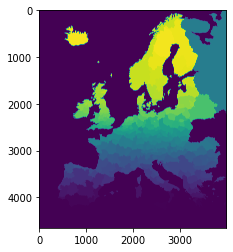

In [6]:
plt.imshow(EU_Map)

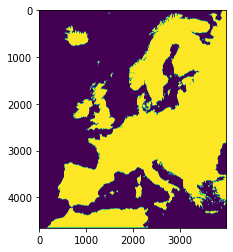

In [7]:
glob=plt.imread("img/Europe.png")
glob=glob[:,1150:,:3]
glob[-100:,2400:4000]=[1,1,1]
glob=glob[:,:4000,2]!=1.0
plt.imshow(glob)
plt.imsave("Data/glob.png",glob,cmap="gray")

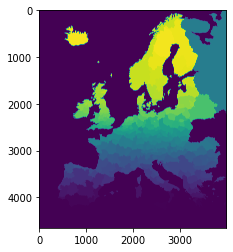

In [8]:
plt.imshow(EU_Map)

In [9]:
EU_Map=EU_Map.astype(np.int)
hn=EU_Map[1:,:]-EU_Map[:-1,:]
vn=EU_Map[:,1:]-EU_Map[:,:-1]

h,w=hn.shape

num_classes=int(np.max(EU_Map))+1
adjmat=[{i} for i in range(num_classes)]
for i in range(h-1):
    for j in range(w-1):
        if hn[i,j]:
            adjmat[EU_Map[i,j]].add(EU_Map[i,j]+hn[i,j])
            adjmat[EU_Map[i,j]+hn[i,j]].add(EU_Map[i,j])
        if vn[i,j]:
            adjmat[EU_Map[i,j]+vn[i,j]].add(EU_Map[i,j])


65
98
112
116
117
86
120
88


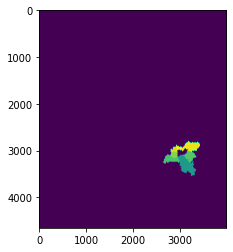

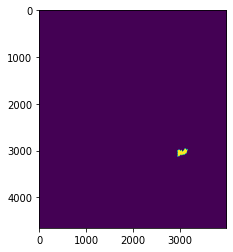

In [10]:
countrie=100
test=np.zeros(EU_Map.shape)
for n in adjmat[countrie]:
    if n == countrie:
        continue
    c=EU_Map==n
    test[c]=n
    print(n)
plt.imshow(test)
plt.show()
plt.imshow(EU_Map==countrie)
plt.show()

In [11]:
import pickle 

In [12]:
pickle.dump((EU_Map,glob,EU_states,adjmat),open("Data/data.bin","wb"))


In [14]:
print(EU_states[1])

[(array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), (4271, 3541))]
